In [1]:
import pandas as pd


In [2]:
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None)


In [3]:
# Load test data
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None)


In [5]:
# Load activity labels
activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', sep='\s+', header=None)


In [6]:
feature_names = pd.read_csv('UCI HAR Dataset/features.txt', sep='\s+', header=None)

In [7]:
# Display shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7352, 561)
y_train shape: (7352, 1)
X_test shape: (2947, 561)
y_test shape: (2947, 1)


In [8]:
# Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

In [13]:
# Preprocess Data
def preprocess_data(X_train, X_test, y_train, y_test):
    # Convert labels to categorical for LSTM
    y_train_categorical = to_categorical(y_train - 1)  # Subtract 1 to make labels start from 0
    y_test_categorical = to_categorical(y_test - 1)

    # Reshape data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

    return X_train_lstm, X_test_lstm, y_train_categorical, y_test_categorical

In [14]:
# Train Machine Learning Models
def train_ml_models(X_train, y_train):
    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train.values.ravel())

    # Train SVM
    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train, y_train.values.ravel())

    # Train Logistic Regression
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train, y_train.values.ravel())

    return rf_model, svm_model, lr_model

In [20]:

# Train LSTM Model
def train_lstm_model(X_train_lstm, y_train_categorical, X_test_lstm, y_test_categorical):
    # Define LSTM model
    lstm_model = Sequential()
    lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], 1)))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(Dense(100, activation='relu'))
    lstm_model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

In [29]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [1 2 3 4 5 6]
Unique values in y_test: [1 2 3 4 5 6]


In [30]:
y_train = y_train - 1
y_test = y_test - 1

In [32]:
num_classes = len(np.unique(y_train))
print(num_classes)

6


In [33]:
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

In [34]:
from keras.utils import to_categorical
import numpy as np

# Reindex labels to be zero-indexed
y_train = y_train - 1
y_test = y_test - 1

# Calculate num_classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# One-hot encode the labels
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Verify the shapes
print("y_train_categorical shape:", y_train_categorical.shape)
print("y_test_categorical shape:", y_test_categorical.shape)

Number of classes: 6
y_train_categorical shape: (7352, 6)
y_test_categorical shape: (2947, 6)


In [35]:
def preprocess_data(X_train, X_test, y_train, y_test):
    # Convert labels to categorical for LSTM
    y_train_categorical = to_categorical(y_train - 1)  # Subtract 1 to make labels start from 0
    y_test_categorical = to_categorical(y_test - 1)

    # Reshape data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

    return X_train_lstm, X_test_lstm, y_train_categorical, y_test_categorical

In [ ]:
def train_ml_models(X_train, y_train, feature_names):
    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train.values.ravel())

    # Display feature importances
    feature_importances = pd.Series(rf_model.feature_importances_, index=feature_names[1])
    print("Top 10 Important Features:")
    print(feature_importances.sort_values(ascending=False).head(10))


In [42]:
# Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load Data
def load_data():
    # Load training data
    X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
    y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None)

    # Load test data
    X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)
    y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None)

    # Load activity labels
    activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', sep='\s+', header=None)

    # Load feature names
    feature_names = pd.read_csv('UCI HAR Dataset/features.txt', sep='\s+', header=None)

    return X_train, y_train, X_test, y_test, activity_labels, feature_names

# Preprocess Data
def preprocess_data(X_train, X_test, y_train, y_test):
    # Convert labels to categorical for LSTM
    y_train_categorical = to_categorical(y_train - 1)  # Subtract 1 to make labels start from 0
    y_test_categorical = to_categorical(y_test - 1)

    # Reshape data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

    return X_train_lstm, X_test_lstm, y_train_categorical, y_test_categorical

# Train Machine Learning Models
def train_ml_models(X_train, y_train, feature_names):
    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train.values.ravel())

    # Display feature importances
    feature_importances = pd.Series(rf_model.feature_importances_, index=feature_names[1])
    print("Top 10 Important Features:")
    print(feature_importances.sort_values(ascending=False).head(10))

    # Train SVM
    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train, y_train.values.ravel())

    # Train Logistic Regression
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train, y_train.values.ravel())

    return rf_model, svm_model, lr_model

# Train LSTM Model
def train_lstm_model(X_train_lstm, y_train_categorical, X_test_lstm, y_test_categorical):
    # Define LSTM model
    lstm_model = Sequential()
    lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], 1)))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(Dense(100, activation='relu'))
    lstm_model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

    # Compile LSTM model
    lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train LSTM model
    lstm_model.fit(X_train_lstm, y_train_categorical, epochs=20, batch_size=64, validation_data=(X_test_lstm, y_test_categorical))

    return lstm_model

# Combine Predictions (Ensemble)
def ensemble_predictions(rf_pred, svm_pred, lr_pred, lstm_pred):
    final_pred = []
    for i in range(len(rf_pred)):
        votes = [rf_pred[i], svm_pred[i], lr_pred[i], lstm_pred[i]]
        final_pred.append(max(set(votes), key=votes.count))  # Majority voting
    return np.array(final_pred)

# Main Function
def main():
    # Step 1: Load Data
    X_train, y_train, X_test, y_test, activity_labels, feature_names = load_data()

    # Step 2: Preprocess Data
    X_train_lstm, X_test_lstm, y_train_categorical, y_test_categorical = preprocess_data(X_train, X_test, y_train, y_test)

    # Step 3: Train Machine Learning Models
    rf_model, svm_model, lr_model = train_ml_models(X_train, y_train, feature_names)

    # Step 4: Train LSTM Model
    lstm_model = train_lstm_model(X_train_lstm, y_train_categorical, X_test_lstm, y_test_categorical)

    # Step 5: Get Predictions
    rf_pred = rf_model.predict(X_test)
    svm_pred = svm_model.predict(X_test)
    lr_pred = lr_model.predict(X_test)
    lstm_pred_probs = lstm_model.predict(X_test_lstm)
    lstm_pred = np.argmax(lstm_pred_probs, axis=1) + 1  # Add 1 to match original labels

    # Step 6: Combine Predictions
    final_pred = ensemble_predictions(rf_pred, svm_pred, lr_pred, lstm_pred)

    # Step 7: Evaluate Ensemble Model
    ensemble_accuracy = accuracy_score(y_test, final_pred)
    print(f"Ensemble Model Accuracy: {ensemble_accuracy * 100:.2f}%")

# Run the Program
if __name__ == "__main__":
    main()

Top 10 Important Features:
1
tGravityAcc-mean()-X      0.036380
tGravityAcc-max()-X       0.030331
angle(X,gravityMean)      0.029676
tGravityAcc-mean()-Y      0.025355
tGravityAcc-energy()-X    0.024963
angle(Y,gravityMean)      0.024415
tGravityAcc-min()-X       0.022650
tGravityAcc-max()-Y       0.021705
tGravityAcc-min()-Y       0.021635
tGravityAcc-energy()-Y    0.017179
dtype: float64


c:\Users\herot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 22s 172ms/step - accuracy: 0.2396 - loss: 1.6271 - val_accuracy: 0.3383 - val_loss: 1.1858
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.3958 - loss: 1.3277 - val_accuracy: 0.4981 - val_loss: 1.0813
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.4445 - loss: 1.0966 - val_accuracy: 0.4401 - val_loss: 1.0976
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.5057 - loss: 1.0369 - val_accuracy: 0.5850 - val_loss: 0.9153
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - accuracy: 0.5745 - loss: 0.9000 - val_accuracy: 0.6196 - val_loss: 0.8143
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.5883 - loss: 0.8435 - val_accuracy: 0.6746 - val_loss: 0.7690
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.6305 - loss: 0.7710 - val_accuracy: 0.6637 - val_loss: 0.7122
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.6385 - loss: 0

c:\Users\herot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - accuracy: 0.2031 - loss: 1.7259 - val_accuracy: 0.2416 - val_loss: 1.7105
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 17s 148ms/step - accuracy: 0.3222 - loss: 1.6010 - val_accuracy: 0.3624 - val_loss: 1.2105
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.4213 - loss: 1.1509 - val_accuracy: 0.4547 - val_loss: 1.0696
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - accuracy: 0.4697 - loss: 1.0817 - val_accuracy: 0.5640 - val_loss: 1.0229
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - accuracy: 0.5138 - loss: 1.0206 - val_accuracy: 0.5572 - val_loss: 0.9470
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.5759 - loss: 0.9404 - val_accuracy: 0.6026 - val_loss: 0.8870
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.6236 - loss: 0.8553 - val_accuracy: 0.6729 - val_loss: 0.7771
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 162ms/step - accuracy: 0.6594 - loss: 0

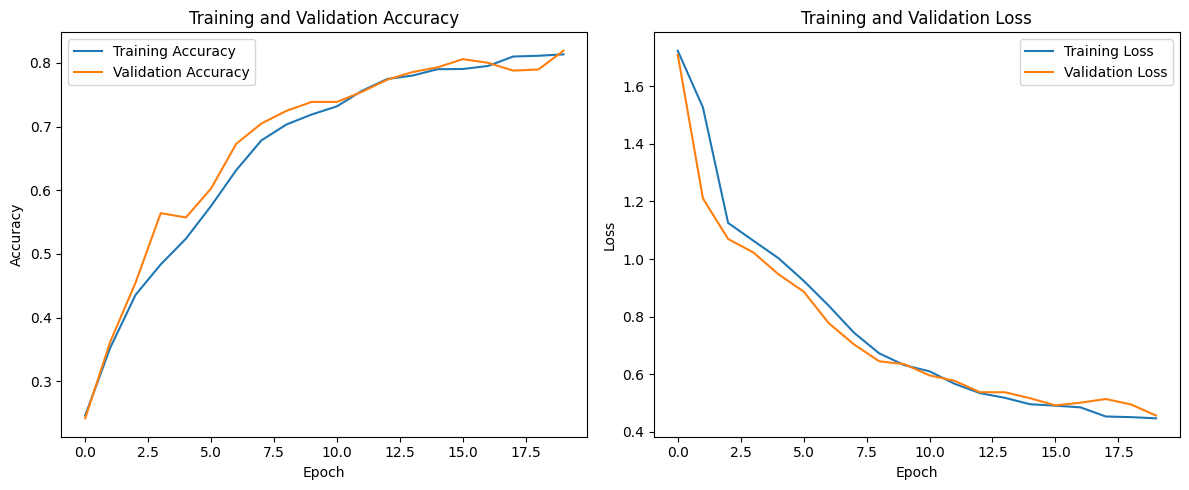

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


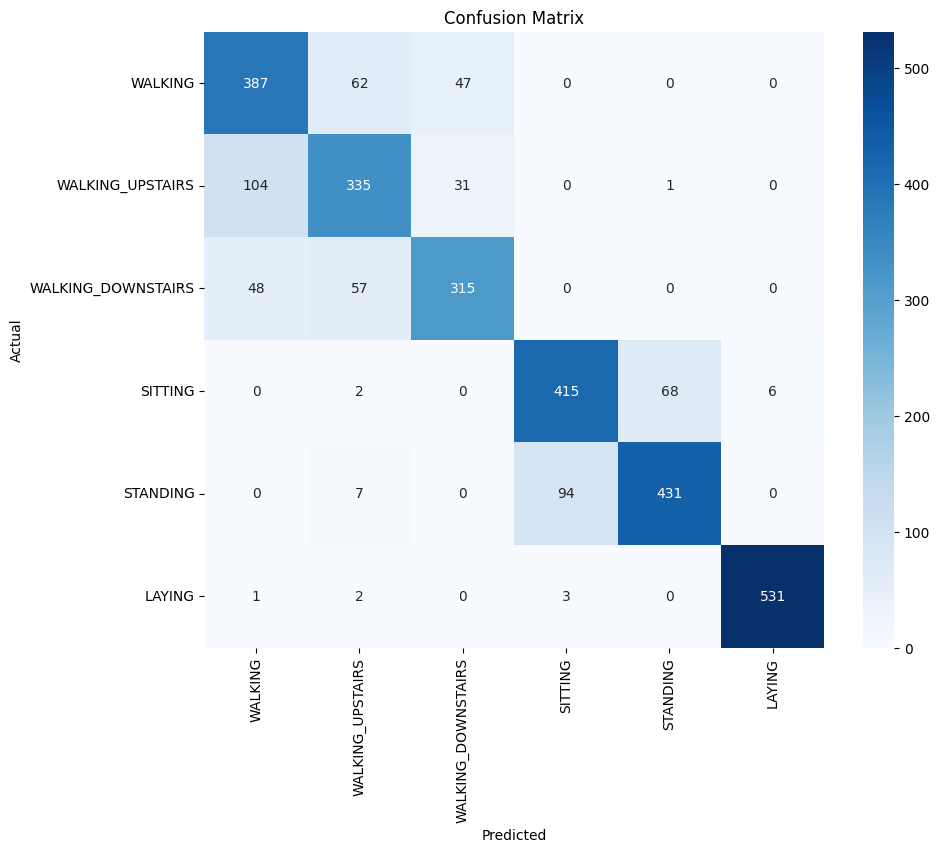

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [47]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model
from sklearn.metrics import confusion_matrix

# Load Data
def load_data():
    # Load training data
    X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
    y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None)

    # Load test data
    X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)
    y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None)

    # Load activity labels
    activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', sep='\s+', header=None)

    return X_train, y_train, X_test, y_test, activity_labels

# Preprocess Data
def preprocess_data(X_train, X_test, y_train, y_test):
    # Convert labels to categorical for LSTM
    y_train_categorical = to_categorical(y_train - 1)  # Subtract 1 to make labels start from 0
    y_test_categorical = to_categorical(y_test - 1)

    # Reshape data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

    return X_train_lstm, X_test_lstm, y_train_categorical, y_test_categorical

# Define and Compile LSTM Model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Plot Training and Validation Curves
def plot_training_curves(history):
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_curves.png')  # Save the figure
    plt.show()

# Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, activity_labels):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels[1], yticklabels=activity_labels[1])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix.png')  # Save the figure
    plt.show()

# Main Function
def main():
    # Step 1: Load Data
    X_train, y_train, X_test, y_test, activity_labels = load_data()

    # Step 2: Preprocess Data
    X_train_lstm, X_test_lstm, y_train_categorical, y_test_categorical = preprocess_data(X_train, X_test, y_train, y_test)

    # Step 3: Define LSTM Model
    input_shape = (X_train_lstm.shape[1], 1)  # Shape of input data (timesteps, features)
    num_classes = y_train_categorical.shape[1]  # Number of output classes
    lstm_model = create_lstm_model(input_shape, num_classes)

    # Step 4: Train LSTM Model
    history = lstm_model.fit(X_train_lstm, y_train_categorical, epochs=20, batch_size=64, validation_data=(X_test_lstm, y_test_categorical))

    # Step 5: Generate Figures
    # Plot training and validation curves
    plot_training_curves(history)

    # Plot confusion matrix
    y_pred = np.argmax(lstm_model.predict(X_test_lstm), axis=1) + 1  # Add 1 to match original labels
    plot_confusion_matrix(y_test, y_pred, activity_labels)

    # Plot LSTM model architecture
    plot_model(lstm_model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

# Run the Program
if __name__ == "__main__":
    main()

IndentationError: unexpected indent (1952314372.py, line 2)